In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## data quality assessment

### assessing Acuracy- Completness - Currency- consistency - relevancy - uniqueness- Validity

#### each table is assessed column by column with recomendation about how to fix the issues found

In [2]:
xls = pd.ExcelFile('KPMG_VI_dataAsses.xlsx')
Transactions = pd.read_excel(xls, 'Transactions')
NewCustomerList = pd.read_excel(xls, 'NewCustomerList')
CustomerDemographic = pd.read_excel(xls, 'CustomerDemographic')
CustomerAdress = pd.read_excel(xls, 'CustomerAddress')

In [3]:
Transactions.head(3)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701


In [4]:
NewCustomerList.head(2)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1.0,1,1.71875


In [5]:
CustomerDemographic.head(2)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11


In [6]:
CustomerAdress.head(2)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10


# Transaction Table

In [7]:
Transactions.columns = Transactions.iloc[0]

In [8]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [9]:
Transactions.drop(0, axis=0, inplace=True)

In [10]:
Transactions.reset_index(inplace = True)

In [11]:
Transactions.head()

,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [12]:
Transactions.columns

Index(['index', 'transaction_id', 'product_id', 'customer_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date'],
      dtype='object', name=0)

In [13]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    20000 non-null  int64 
 1   transaction_id           20000 non-null  object
 2   product_id               20000 non-null  object
 3   customer_id              20000 non-null  object
 4   transaction_date         20000 non-null  object
 5   online_order             19640 non-null  object
 6   order_status             20000 non-null  object
 7   brand                    19803 non-null  object
 8   product_line             19803 non-null  object
 9   product_class            19803 non-null  object
 10  product_size             19803 non-null  object
 11  list_price               20000 non-null  object
 12  standard_cost            19803 non-null  object
 13  product_first_sold_date  19803 non-null  object
dtypes: int64(1), object(13)
memory usage: 

#### we have 20000 elements for transactions_id but  note that Brand, product_line, online order 
#### they have less which means 'MISSING DATA'

In [14]:
#transforming missing data in booleans to visualize them in heatmap for each table
nulls_Transactions=Transactions.isnull()

#nulls_CustomerDemographic=CustomerDemographic.isnull()
#nulls_CustomerAdress=CustomerAdress.isnull()

Text(0.5, 1.0, 'Transactions Missing values')

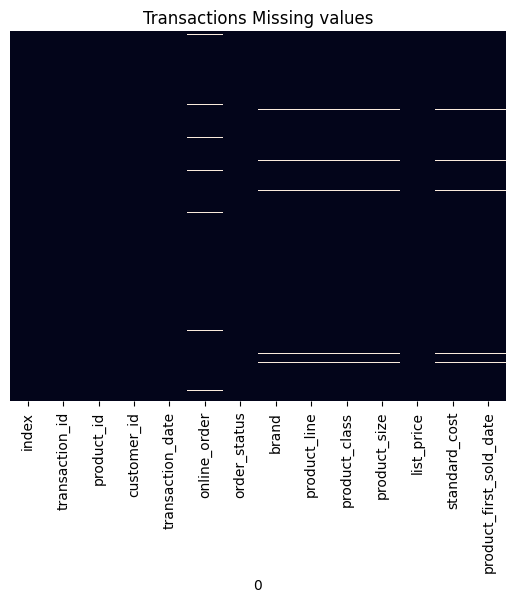

In [15]:
sns.heatmap(nulls_Transactions, yticklabels = False,cbar= False)
plt.title('Transactions Missing values')

### checking number of missing data per column

In [16]:
Transactions.isnull().sum()

0
index                        0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

### Recomendation to deal with missing values is :retrievw the data if it exists, use imputation method, replacing with the median or the mode depending on the data, or simply drop the N/A if they the amount of N/A is acceptable.

In [17]:
Transactions['transaction_id'].describe()

count     20000
unique    20000
top           1
freq          1
Name: transaction_id, dtype: int64

#### no duplicate data

#### The product first_sold date does not seem to be a date format, or even a wrong formatted date, maybe it should be reviewed

In [18]:
#reviewing transaction date column

print('maxDate is: ' , Transactions['transaction_date'].max())

print ('minDtae is:', Transactions['transaction_date'].min())

maxDate is:  2017-12-30 00:00:00
minDtae is: 2017-01-01 00:00:00


In [19]:
Transactions['transaction_date'][1]

datetime.datetime(2017, 5, 21, 0, 0)

In [20]:
#reviewewing order status consistency
Transactions['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [21]:
#reviewewing Brands consistency
Transactions['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [22]:
#reviewewing list price columms
print('maxPrice is: ' , Transactions['list_price'].max())

print ('minPrice is:', Transactions['list_price'].min())

maxPrice is:  2091.47
minPrice is: 12.01


<Axes: ylabel='Frequency'>

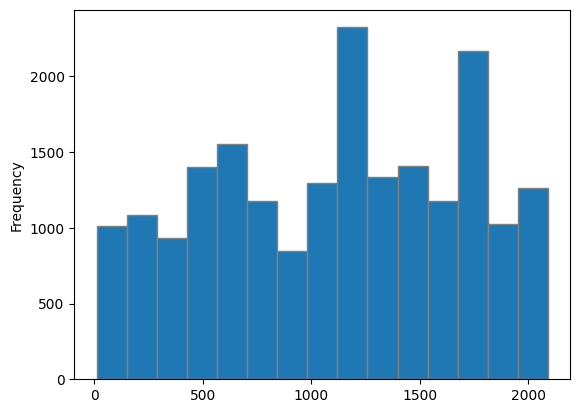

In [23]:
Transactions['list_price'].plot(kind='hist', bins =15, edgecolor='gray')

# NewCustomerList Table

In [24]:
NewCustomerList = pd.read_excel(xls, 'NewCustomerList')

In [25]:
NewCustomerList.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.49,0.4900,0.612500,0.520625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.51,0.5100,0.510000,0.510000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.07,1.3375,1.337500,1.337500,4.0,4,1.703125


In [26]:
NewCustomerList.columns= NewCustomerList.iloc[0]

In [27]:
NewCustomerList.head(2)
NewCustomerList.drop(0, axis=0, inplace=True)


In [28]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.49,0.4900,0.612500,0.520625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.51,0.5100,0.510000,0.510000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.07,1.3375,1.337500,1.337500,4.0,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.10,1.1000,1.375000,1.375000,4.0,4,1.703125


In [29]:
NewCustomerList.reset_index(inplace= True)

In [30]:
NewCustomerList.head(3)

,index,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1.0,1,1.71875
1,2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,NSW,Australia,11,0.49,0.4900,0.612500,0.520625,1.0,1,1.71875
2,3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,VIC,Australia,5,0.51,0.5100,0.510000,0.510000,1.0,1,1.71875


In [31]:
nulls_NewCustomerList=NewCustomerList.isnull()

Text(0.5, 1.0, 'NewCustomerList Missing values')

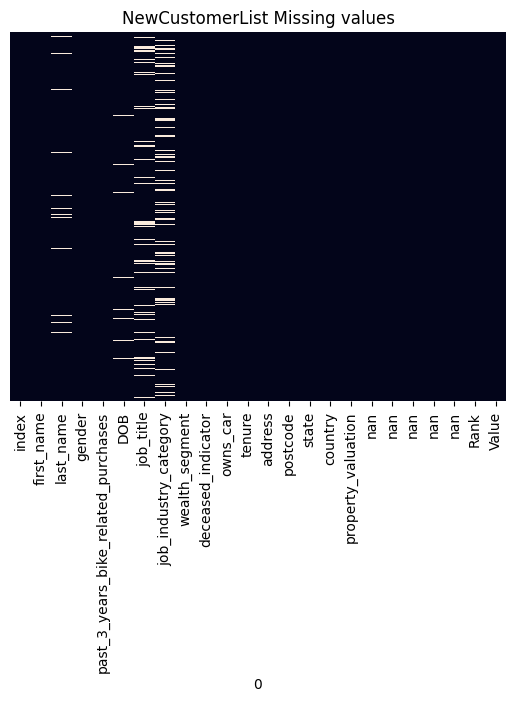

In [32]:
sns.heatmap(nulls_NewCustomerList, yticklabels = False,cbar= False)
plt.title('NewCustomerList Missing values')

In [33]:
NewCustomerList.isnull().sum()

0
index                                    0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
NaN                                      0
NaN                                      0
NaN                                      0
NaN                                      0
NaN                                      0
Rank                                     0
Value    

### Mainly there is null in the last_name, Jobtitle, jon_industy_category columns, maybe that information can be retrieved in other columns with the same information, if not use the recommendations for dealing with data in the Transaction table notes

In [34]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                1000 non-null   int64  
 1   first_name                           1000 non-null   object 
 2   last_name                            971 non-null    object 
 3   gender                               1000 non-null   object 
 4   past_3_years_bike_related_purchases  1000 non-null   object 
 5   DOB                                  983 non-null    object 
 6   job_title                            894 non-null    object 
 7   job_industry_category                835 non-null    object 
 8   wealth_segment                       1000 non-null   object 
 9   deceased_indicator                   1000 non-null   object 
 10  owns_car                             1000 non-null   object 
 11  tenure                         



### propertity_valuation : the numbers look low, or it'll be necessary to verify if this is a kind of standarization or expressions

### There are 4 columns named NAN, we'll need to populate those  column names

In [35]:
#reviewing the DOB column
NewCustomerList['DOB'].unique()

array(['1957-07-12', '1970-03-22', datetime.datetime(1974, 8, 28, 0, 0),
       '1979-01-28', '1965-09-21', '1951-04-29', '1976-10-06',
       '1972-12-27', '1972-04-28', '1985-08-02', '1995-01-01',
       '1999-08-30', '1990-05-13', '1976-12-09', '1964-04-19',
       '1954-03-31', '1993-08-22', datetime.datetime(1976, 6, 8, 0, 0),
       '1938-11-09', '1954-08-12', '1968-12-21', '1993-09-29',
       '1998-02-05', datetime.datetime(1977, 12, 17, 0, 0), '1982-10-11',
       '1945-08-03', '1952-06-27', '1966-07-20', '1960-12-10',
       '1960-11-22', '1980-01-26', '1951-11-28', '1987-01-15',
       '1981-09-22', datetime.datetime(1977, 5, 9, 0, 0), '1975-05-10',
       '1968-03-25', '1979-04-11', '1955-06-13', '1993-08-28',
       '1953-02-13', '1985-03-14', '1946-10-25', '1966-09-18',
       '1961-12-05', '1956-08-30', '1956-07-16', '1994-12-04',
       '1977-05-14', '1950-05-03', datetime.datetime(1978, 2, 11, 0, 0),
       '1999-03-22', '1993-12-19', '1981-12-01', '1995-03-25',
      


#### the DOB column has some inconistency in the data type, some of them are strings and orders are datetime
### it can be fix reformatting the column todatetime
#### it can be easier to work with date if we separate each of them in a column as day-month-year, also check the  range of the
#### data to see if they're no outliers




In [36]:
#reviewing jobtile column
NewCustomerList['job_title'].unique()

array(['General Manager', 'Structural Engineer', 'Senior Cost Accountant',
       'Account Representative III', 'Financial Analyst',
       'Assistant Media Planner', 'Compensation Analyst',
       'Human Resources Assistant II', 'Speech Pathologist',
       'Accounting Assistant IV', 'Programmer Analyst I',
       'Environmental Specialist', 'Human Resources Manager',
       'VP Marketing', 'Clinical Specialist', nan, 'Associate Professor',
       'Actuary', 'Internal Auditor', 'Programmer I', 'Quality Engineer',
       'Quality Control Specialist', 'Account Executive', 'Engineer II',
       'Nurse', 'Librarian', 'Paralegal', 'Assistant Manager',
       'Senior Quality Engineer', 'Recruiting Manager', 'Design Engineer',
       'Business Systems Development Analyst', 'VP Quality Control',
       'Cost Accountant', 'Product Engineer', 'Social Worker',
       'Payment Adjustment Coordinator', 'Marketing Assistant',
       'Recruiter', 'VP Product Management', 'Media Manager III',
       

### if useful maybe it'll be good to separate the jobtitle to the level each in one column and like that we can group by field

In [37]:
#reviewing job industry category column
NewCustomerList['job_industry_category'].unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', nan, 'Argiculture'],
      dtype=object)

In [38]:
NewCustomerList['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [39]:
NewCustomerList['deceased_indicator'].unique()

array(['N'], dtype=object)

In [40]:
NewCustomerList['address'].head()

0       45 Shopko Center
1      14 Mccormick Park
2    5 Colorado Crossing
3     207 Annamark Plaza
4      115 Montana Place
Name: address, dtype: object

In [41]:
NewCustomerList['country'].unique()

array(['Australia'], dtype=object)

In [42]:
NewCustomerList['state'].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [43]:
NewCustomerList['property_valuation'].unique()

array(['6', '11', '5', '1', '9', '7', '10', '8', '4', '2', 11, '12', '3',
       8, 6, 7], dtype=object)

In [44]:
NewCustomerList['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [45]:
NewCustomerList['Rank'].unique()

array([1, 4, 6, 8, 10, 12, 13, 14, 16, 17, 19, 21, 23, 25, 26, 30, 32, 36,
       38, 40, 42, 44, 46, 50, 52, 54, 57, 62, 65, 68, 72, 77, 78, 84, 85,
       88, 89, 96, 99, 102, 104, 111, 114, 120, 125, 127, 132, 133, 142,
       144, 146, 152, 153, 154, 155, 157, 158, 163, 166, 173, 174, 177,
       181, 188, 190, 191, 195, 201, 202, 206, 212, 215, 218, 219, 223,
       226, 230, 231, 233, 237, 240, 241, 244, 248, 249, 250, 252, 259,
       271, 274, 278, 282, 284, 285, 287, 289, 291, 295, 297, 302, 304,
       310, 312, 320, 322, 324, 326, 329, 334, 338, 341, 345, 349, 355,
       356, 358, 361, 366, 370, 371, 372, 375, 378, 382, 386, 395, 396,
       401, 405, 408, 409, 414, 415, 418, 419, 420, 427, 429, 430, 433,
       436, 441, 444, 450, 455, 464, 466, 468, 471, 473, 475, 478, 483,
       485, 486, 492, 494, 495, 498, 500, 502, 504, 507, 513, 515, 520,
       524, 526, 529, 530, 536, 544, 546, 549, 551, 552, 555, 561, 562,
       563, 568, 574, 575, 582, 583, 587, 590, 591, 594, 

### This rank column look like just another Index, maybe we'll drop it after verification

In [46]:
NewCustomerList['Value'].head()

0     1.71875
1     1.71875
2     1.71875
3    1.703125
4    1.703125
Name: Value, dtype: object

#### It is not clear what the value represent, a description  of all the data will be very useful to us

# Customer demographic table

In [47]:
CustomerDemographic = pd.read_excel(xls, 'CustomerDemographic')

In [48]:
CustomerDemographic.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [49]:
CustomerDemographic.columns=CustomerDemographic.iloc[0]

In [50]:
CustomerDemographic.drop(0,axis=0, inplace= True)

In [51]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [52]:
CustomerDemographic.reset_index(inplace=True)

In [53]:
CustomerDemographic.head(3)

,index,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15


In [54]:
CustomerDemographic.drop('index', axis=1, inplace= True)

In [55]:
CustomerDemographic.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15


### first quick glance: we'll need a better understanding of the default column, what is it, or if we can just delete it

In [56]:
nulls_CustomerDemografic=CustomerDemographic.isnull()

Text(0.5, 1.0, 'CustomerDemografic Missing values')

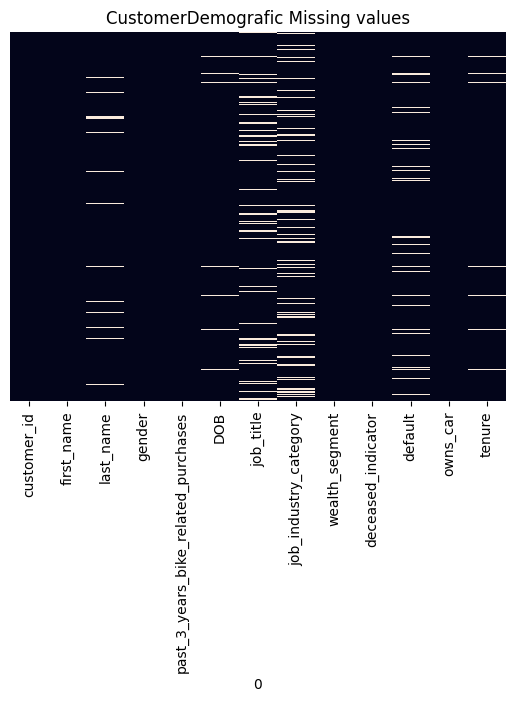

In [57]:
sns.heatmap(nulls_CustomerDemografic, yticklabels = False,cbar= False)
plt.title('CustomerDemografic Missing values')

In [58]:
nulls_CustomerDemografic.sum()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [59]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [60]:
CustomerDemographic['customer_id'].nunique()

4000

In [61]:
CustomerDemographic['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

### it'll be necesary to standarized the gender column, using, Male, Female, U or  M, F, U

In [72]:

CustomerDemographic['DOB']

0       1953-10-12 00:00:00
1       1980-12-16 00:00:00
2       1954-01-20 00:00:00
3       1961-10-03 00:00:00
4       1977-05-13 00:00:00
               ...         
3995    1975-08-09 00:00:00
3996    2001-07-13 00:00:00
3997                    NaN
3998    1973-10-24 00:00:00
3999    1991-11-05 00:00:00
Name: DOB, Length: 4000, dtype: object

In [62]:
print('maxDate is: ' , CustomerDemographic['DOB'].max())

print ('minDtae is:',CustomerDemographic['DOB'].min())

TypeError: '>=' not supported between instances of 'datetime.datetime' and 'str'

### When trying to run this code we got the error : '>=' not supported between instances of 'datetime.datetime' and 'str'
### It means that not all the dat in tha DOB column is formated as Datetime and we'll need to fix that

In [73]:
CustomerDemographic['job_title'].nunique()

195

In [74]:
CustomerDemographic['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [75]:
CustomerDemographic['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [76]:
CustomerDemographic['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [77]:
CustomerDemographic['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

<Axes: ylabel='Frequency'>

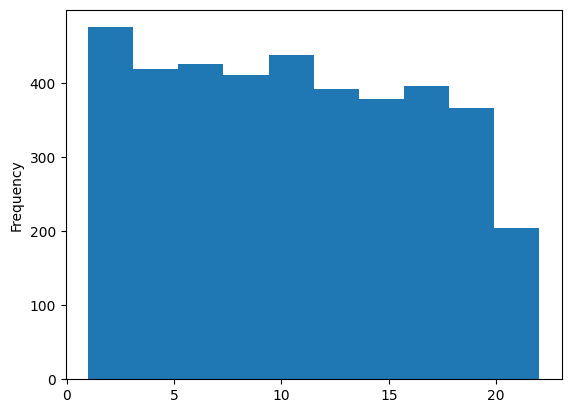

In [78]:
CustomerDemographic['tenure'].plot(kind= 'hist', bins=10)

# Customer Adress Table

In [79]:
CustomerAdress = pd.read_excel(xls, 'CustomerAddress')

In [80]:
CustomerAdress.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [81]:
CustomerAdress.columns= CustomerAdress.iloc[0]

In [82]:
CustomerAdress.drop(0, axis = 0, inplace= True)


In [83]:
CustomerAdress.reset_index(inplace=True)

In [84]:
CustomerAdress.head()

,index,customer_id,address,postcode,state,country,property_valuation
0,1,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,4,0 Holy Cross Court,4211,QLD,Australia,9
3,4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,6,9 Oakridge Court,3216,VIC,Australia,9


In [85]:
CustomerAdress.drop('index', axis=1, inplace=True)


In [86]:
CustomerAdress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [87]:
CustomerAdress.isnull().sum()

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [88]:
CustomerAdress['customer_id'].nunique()

3999

In [89]:
CustomerAdress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


# DATA CLEANING

In [90]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    20000 non-null  int64 
 1   transaction_id           20000 non-null  object
 2   product_id               20000 non-null  object
 3   customer_id              20000 non-null  object
 4   transaction_date         20000 non-null  object
 5   online_order             19640 non-null  object
 6   order_status             20000 non-null  object
 7   brand                    19803 non-null  object
 8   product_line             19803 non-null  object
 9   product_class            19803 non-null  object
 10  product_size             19803 non-null  object
 11  list_price               20000 non-null  object
 12  standard_cost            19803 non-null  object
 13  product_first_sold_date  19803 non-null  object
dtypes: int64(1), object(13)
memory usage: 

In [91]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [92]:
Transactions['customer_id']= Transactions['customer_id'].astype(str)

In [93]:
CustomerDemographic['customer_id']= CustomerDemographic['customer_id'].astype(str)

In [94]:
customer_fullDemographic = pd.merge(CustomerDemographic, CustomerAdress,on='customer_id', how='left')

In [95]:
customer_fullDemographic.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7,NaN,NaN,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8,NaN,NaN,NaN,NaN,NaN


In [96]:
customer_fullDemographic.isnull().sum()

0
customer_id                               0
first_name                                0
last_name                               125
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                      87
job_title                               506
job_industry_category                   656
wealth_segment                            0
deceased_indicator                        0
default                                 302
owns_car                                  0
tenure                                   87
address                                4000
postcode                               4000
state                                  4000
country                                4000
property_valuation                     4000
dtype: int64

In [82]:
customer_fullDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          7999 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [83]:
customer_fullDemographic['customer_id'].nunique()

7999

In [84]:
customer_fullDemographic[customer_fullDemographic['customer_id']==1].count()

0
customer_id                            1
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
address                                1
postcode                               1
state                                  1
country                                1
property_valuation                     1
dtype: int64

In [85]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    20000 non-null  int64 
 1   transaction_id           20000 non-null  object
 2   product_id               20000 non-null  object
 3   customer_id              20000 non-null  object
 4   transaction_date         20000 non-null  object
 5   online_order             19640 non-null  object
 6   order_status             20000 non-null  object
 7   brand                    19803 non-null  object
 8   product_line             19803 non-null  object
 9   product_class            19803 non-null  object
 10  product_size             19803 non-null  object
 11  list_price               20000 non-null  object
 12  standard_cost            19803 non-null  object
 13  product_first_sold_date  19803 non-null  object
dtypes: int64(1), object(13)
memory usage: 

<bound method IndexOpsMixin.nunique of 0         2
1         3
2        37
3        88
4        78
         ..
19995    51
19996    41
19997    87
19998     6
19999    11
Name: product_id, Length: 20000, dtype: object>